# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/entrylevelcs/CS39AA-Project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/entrylevelcs/CS39AA-Project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

For this project I am looking at a data set of steam reviews and specifically focusing on predicting if the user would recommend a game based on the review that they gave. This is a binary classification problem since we are classifying if the user would recommend or not recommend a game based on the given review. Additionally, I had chatgpt generate a training data file that had the same key information that our real data set had. I want to see how well a model would perform with predicting a real data set if it were trained using an AI generated training data set.

The real data set being used can be found here: https://www.kaggle.com/datasets/andrewmvd/steam-reviews/

For the AI generated data set I used prompts such as:

1. "generate a table with one column being counter-strike: global offensive reviews and another column classifying the sentiment of the review as either positive or negative."
2. "generate a table with one column being steam game reviews and another column classifying the sentiment of the review as either positive or negative."
3. "do that again but make the negative reviews sound positive."
4. "do that again but make the positive reviews sound negative."

I would then make chatgpt format the tables as csv files that way I could copy and paste it into a csv file containing these reviews.

To summarize we are training a model with some data set of human steam reviews and using that to predict whether some other steam review suggests a recommendation or not. We are also using AI generated steam reviews to train another model and seeing how well that can predict the same set of steam review recommendations.

## 2. Exploratory Data Analysis

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# ...

Get the data set from real steam reviews. Then grabs a sample of 12500 that we will use to set up our validation and test data.

In [2]:
human_data = 'https://raw.githubusercontent.com/entrylevelcs/CS39AA-Project/main/human_dataset.csv'
df = pd.read_csv(human_data)
df = df[df["review_text"].notnull()]
sample_size = len(df)
#sample_size = 25000
#df = df.sample(sample_size)
# previous two lines are for sampling from the entire human dataset

Get the data set that was generated by chatgpt. This review data started as only being about CS:GO but has been expanded to be more general and talk about other games.

In [3]:
ai_data = 'https://raw.githubusercontent.com/entrylevelcs/CS39AA-Project/main/gpt3.5_generated_data.csv'
df2 = pd.read_csv(ai_data)

Display the head of the real data set

In [4]:
df.head()

,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes
0,949219,212680,FTL: Faster Than Light,Really gg.,1,0
1,1151136,218620,PAYDAY 2,"I'm not entirely sure what I was expecting, bu...",-1,0
2,4031479,31280,Poker Night at the Inventory,"First I thought I was gonna buy this, play so ...",1,0
3,6382952,94400,Nidhogg,Stab your opponent repeatedly and win the glor...,1,0
4,3770644,300060,ADR1FT,I think this experience is pretty much defined...,1,0


Display the head of the AI generated data set. The "sentiment" column is the same as the "review_score" column in the real data set. For both 1 means that the user recommended the game and a -1 means that the user did not recommend the game.

In [5]:
df2.head()

,Review,Sentiment
0,Counter-Strike: Global Offensive is the best g...,1
1,I love playing CS:GO with my friends.,1
2,The graphics and gameplay are outstanding.,1
3,This game is incredibly addictive.,1
4,CS:GO's competitive scene is awesome.,1


Count all the words that each review has so that we can put some numbers to our observations.

In [6]:
df2["number of words"] = df2["Review"].apply(lambda n: len(n.split()))
df["number of words"] = df["review_text"].apply(lambda n: len(n.split()))

Display information about the observations obtained from the real steam reviews.

In [7]:
df["number of words"].describe()

count    24971.000000
mean        55.874054
std        111.478890
min          1.000000
25%          6.000000
50%         20.000000
75%         57.000000
max       3959.000000
Name: number of words, dtype: float64

Frequency plot for number of words in the real steam reviews. We sorted and cut out some of the frequencies so that the plot would be slightly easier to read.

<Axes: ylabel='Frequency'>

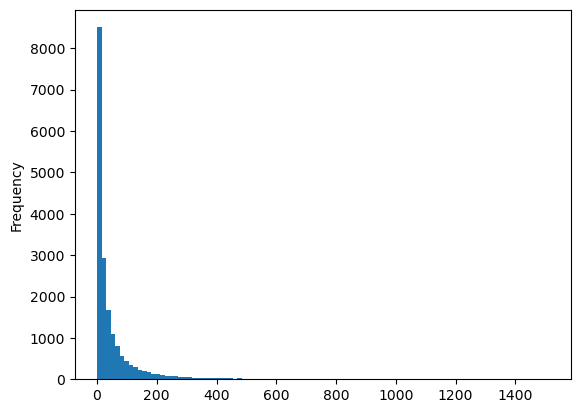

In [8]:
ser = df["number of words"]
ser.sort_values()
len(ser)
ser[:18500].plot.hist(bins=100)

Display information about the observations obtained from the AI generated steam reviews.

In [9]:
df2["number of words"].describe()

count    2496.000000
mean       10.082933
std         4.278100
min         3.000000
25%         6.000000
50%        10.000000
75%        13.000000
max        49.000000
Name: number of words, dtype: float64

Frequency plot for number of words in the AI generated data set.

<Axes: ylabel='Frequency'>

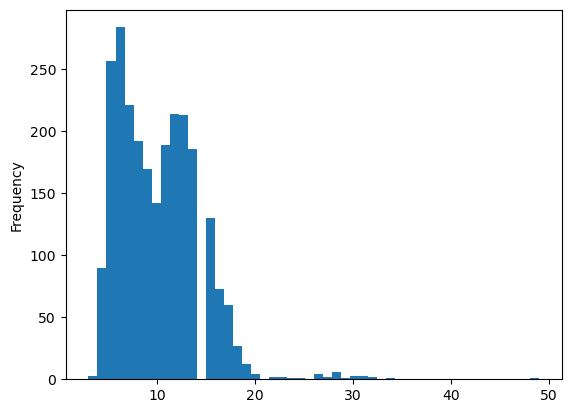

In [10]:
df2["number of words"].plot.hist(bins=50)

Sets up our different inputs and outputs. X and y are the inputs and outputs from the real steam reviews while X1 and y1 are from the AI generated reviews. I also adjusted the test size so that the training data size the same length as the AI generated data set. From the shape of each we can see that the vocab size is 11127 words.

In [11]:
X = df['review_text'].copy()
y = df['review_score'].copy()
X1 = df2['Review'].copy()
y1 = df2[' Sentiment'].copy()
ai_data_size = X1.size

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=((sample_size-ai_data_size)/sample_size), random_state=21)

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw.values.astype('U')).toarray()
X_val = tfidf_vectorizer.transform(X_val_raw.values.astype('U')).toarray()
X1_train = tfidf_vectorizer.transform(X1.values.astype('U')).toarray()

print(f"X_train.shape = {X_train.shape}")
print(f"X1_train.shape = {X1_train.shape}")

X_train.shape = (2496, 11127)
X1_train.shape = (2496, 11127)


Creates a quick model using KNeighborsClassifier and the real reviews so that we can see how a model trained with the real reviews performs.

accuracy (on y_train): 0.9627


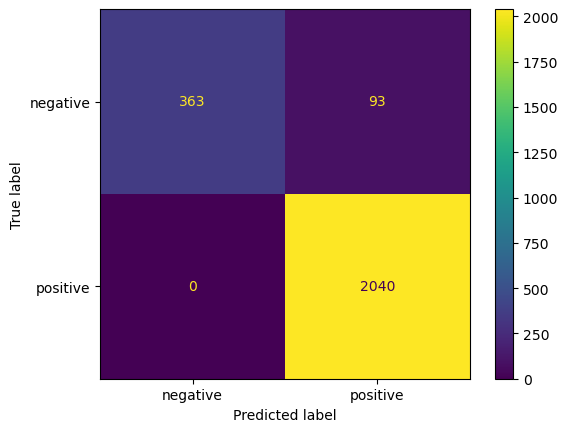

In [12]:
model = KNeighborsClassifier(n_neighbors=12,weights='distance')
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['negative', 'positive'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

Continuation of the previous code but we are using the validation data to get the accuracy.

accuracy (on y_val): 0.8197


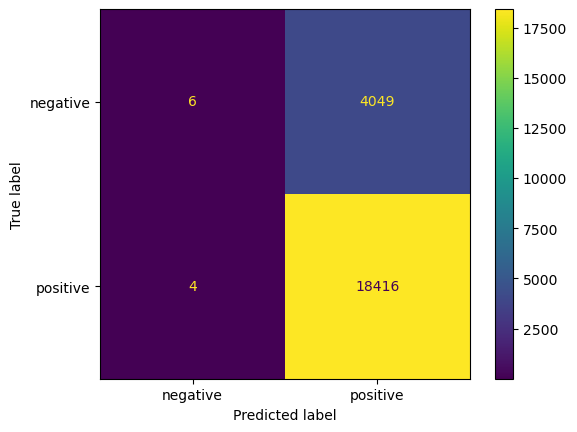

In [13]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['negative', 'positive'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

Now we retrain the model using the AI generated data and plot that to see how it performs on the real validation set.

accuracy (on y_val): 0.5379


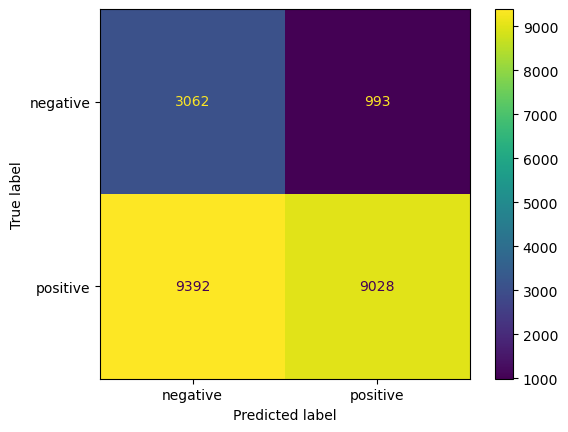

In [14]:
model = model.fit(X1_train, y1)

predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['negative', 'positive'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")